# Preliminary observations

In this Data Analysis, a dataset ($n=299$) of user engagement statistics for October 2019 are provided from [Showwcase](https://www.showwcase.com/). Opening the CSV in Excel reveals that many things, such as a need for data enhancement. 

In this, I aim to define user engagement, verify data integrity, improve user engagement metrics, and understand how users are engaging. 

# Contents


**I. Defining User Engagement**

**II. Data Integrity and Enhancement** 
1. Importing Data, Simple Exploration, Eradicating NaNs
2. Data Integrity: Duplicates
3. Data Enhancement: Multiple Same-Day Sessions 
4. Data Enhancement: True Active Time
5. Data Enhancement: Improvements for Showwcase 


**III. Data Exploration**
1. Heat Maps and Scatter Plots
2. Frequency of events
3. Inactivity from bugs

**IV. Conclusion**

# I. Defining User Engagement

With little experience in user engagement analytics, I did a google search to uncover a definition for user engagement. From [Mixpanel](https://mixpanel.com/topics/what-is-user-engagement/) I base my definition. 

First, it is crucial to define what Showwcase is. Showwcase is similar to Linkedin but is focused on showcasing tech projects. Much like Linkedin, Showwcase offers a way to track posts through likes, comments, or posting. These metrics are great at tracking engagement, but people don't always engage these. Instead, they might read a project or article then move on without a like. Thus, user engagement must be defined by session duration, likes, comments, and posts added. 


# II. Data Integrity and Enhancement


## 1. Importing Data, Simple Exploration, Eradicating NaNs

To work with data in Python we must first call in necessary libraries. 

In [1]:
#Importing libraries to enhance the data set and visualize.
import numpy as np
import matplotlib.pyplot as plt
#Pandas is built on Numpy and seaborn is built on Matplotlib
import pandas as pd 
import seaborn as sns

In [2]:
#Importing the data into Python
df = pd.read_csv("showwcase_sessions.csv")
#Seeing the first two entries. 
df.head()


,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [3]:
#Ensuring data integrity 
df.tail()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Excel's indexing system uses positive integers, while Python uses non-negative integers. Thus when importing two NaNs are created due to indexing differences.  

We must rid the dataframe of any NaNs.

In [4]:
df.dropna(inplace = True)

In [5]:
#Changing True/False into zeros and ones.
df = df*1

While the dataset is clear of any NaNs, this does not ensure integrity. Mistakes occur in data entry. People sometimes enter duplicates.

## 2. Data Integrity: Duplicates

To check for duplicates, we can use built-in Pandas functions to search on the data frame. Calling the name of all columns expedites the processes. 

In [6]:
#Calling column names
df.columns

Index(['session_id', 'customer_id', 'login_date', 'projects_added',
       'likes_given', 'comment_given', 'inactive_status', 'bug_occured',
       'session_projects_added', 'session_likes_given',
       'session_comments_given', 'inactive_duration', 'bugs_in_session',
       'session_duration'],
      dtype='object')

Searching on 3 unique identifiers, we can flag duplicates. 

In [7]:
#Using 3 identifiers, we will search for any duplicate columns. 
df.duplicated(subset = ['session_id', 'customer_id', 'login_date']).sum()

0

**.sum()** is used to find the total amount of duplicates. The number 0 indicates uniqueness. While this tells us that no two rows are the same, but the dataset can be enhanced from existing columns. 


## 3. Data Enhancement 

To achieve better insight into user engagement on Showwcase, we must enhance our data set. For instance, Showwcase allows multiple logins in a day. With this in mind, we can enhance the data set by adding indicators and quantities for login in amounts. 

Using **df.duplicated()** on **'customer_id'** and **'login_date'** we can determine if they logged in multiple times in the same day. 

In [8]:
#Searching for multiple sessions in one day.
df.duplicated(subset =[ 'customer_id','login_date' ]).sum()


39

Since the sum is 39, some users logged in multiple times a day. While these duplicates indicate same day logins, **df.duplicated()** marks entries after the first. Therefore, not all logins present.  

For example: In the code below, we see that **customer_id: 40235** on **login_date: 10/26/19** is listed twice. Further searching indicates that they logged in more than the two listed times. 

In [9]:
df.loc[df.duplicated(subset =[ 'customer_id','login_date' ])].head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
42,502502.0,40235.0,10/26/19,1,1,1,0,1,1.0,9.0,3.0,0.0,5.0,1521.0
45,773611.0,51243.0,10/26/19,0,0,1,1,1,0.0,0.0,2.0,2017.0,5.0,335.0
46,999480.0,23083.0,10/26/19,0,0,1,1,0,0.0,0.0,1.0,1535.0,0.0,695.0
49,554554.0,40572.0,10/26/19,1,1,1,1,1,1.0,5.0,4.0,1836.0,5.0,999.0
51,504793.0,23404.0,10/26/19,1,1,0,0,1,3.0,27.0,0.0,0.0,5.0,1778.0


In [10]:
df.loc[ (df.customer_id == 40235.0) & (df.login_date == "10/26/19") ]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
38,243941.0,40235.0,10/26/19,1,1,1,0,0,2.0,15.0,1.0,0.0,0.0,2313.0
42,502502.0,40235.0,10/26/19,1,1,1,0,1,1.0,9.0,3.0,0.0,5.0,1521.0
52,636836.0,40235.0,10/26/19,1,1,1,1,0,3.0,14.0,4.0,1741.0,0.0,1910.0


To address this, we will first make the **"login_amount"** variable. This will tell us how many times a user logged in a day. To accomplish this, we will use **.groupby** on the two relevant columns. Then, save it as a data frame. 

In [11]:
#Making a dataframe of the total single day logins.
x = pd.DataFrame(df.groupby(['customer_id', 'login_date']).size())

In [12]:
x

0
customer_id login_date   
10246.0     10/15/19    1
            10/21/19    2
            10/6/19     1
12407.0     10/17/19    1
            10/18/19    1
...                    ..
98653.0     10/20/19    1
            10/21/19    1
            10/25/19    1
            10/29/19    1
            10/6/19     1

[260 rows x 1 columns]

The column **'0'** hosts the number of same-day logins. With this, we can use Pandas and basic SQL knowledge to join on indexes **'customer_id'** and **'login_date'**. 

In [13]:
#Using .merge can join the information
df = pd.merge(df,x, on= ["customer_id" , "login_date"])

In [14]:
#We must rename 0 to the desired name
df.rename(columns = {0:"login_amount"}, inplace = True)

Now the data frame indicates how many times a user logged-in. To match the dataset, we will create a boolean column if they logged in more than once. 

In [15]:
# Using a list and conditional for loop will accomplish this. 
sessions = []
for i in range(len(df)): 
    if df["login_amount"][i] != 1:
        sessions.append(1)
    else:
        sessions.append(0)        

df["multiple_sessions"] =   sessions

We have completed multiple session login enhancement.


## 4. Data Enhancement: True Active Time

From the given data set, we know the session duration and inactive duration. From this,  we can glean the true session duration. 

In [16]:
#There is no logical operator for -. Thus we can subtract away. 
df["true_session_duration"] = df["session_duration"] - df["inactive_duration"]

In [17]:
df.true_session_duration.values

array([  418.,  1633.,   659.,   633.,   274.,  -256.,  1329.,  -599.,
         290.,   -74.,   444., -1961.,   466.,    39.,  -311.,  1188.,
       -1401.,  -642.,   505.,   878.,   378.,  -222.,  1346.,  2114.,
        2381.,  1610.,  1054., -1361.,   534., -1075.,   -91., -1306.,
       -1846.,  -411.,  1670.,  1418., -1496.,  -837.,  1759.,  2313.,
        1521.,   169.,   127., -1682.,  -181.,  -840.,  1508.,  1778.,
       -1214.,    45.,   419.,   684.,   451.,  1132.,  -141.,   541.,
       -1229.,   323.,  1152.,  2381.,   436.,    10.,   491.,  2140.,
        -279., -2068., -1535.,   896.,   255., -1137.,   724.,  -832.,
        2220.,  -948.,  1526.,  1852.,  1319.,   195.,   835.,  -266.,
         448., -2005.,  1732.,   621.,   554.,   873.,   691.,  1127.,
        1374.,  -245., -2067.,   346., -1445.,   854.,  -515.,   530.,
        1853.,  1154.,  1199.,   467.,  -340.,  -432.,  1274.,     6.,
        -787.,  -707.,   976.,  -903.,  1984.,  2173.,  1348.,  2078.,
      

 **'session_engagement'** is defined as, "number of seconds a user was logged for that session". Since the language was not precise, I assumed this was the total time. 

Subtractions indicated **'session_engagement'** is the number of seconds a user was actively logged in.
Thus true session duration already existed and the above enhancement must be dropped. 

In [18]:
# Removing an added column
df.drop("true_session_duration", axis = 1, inplace = True)

With the dataset enhanced from existing variables, it is important to note possible variables can track user engagement.

## 5. Data Enhancement: Showwcase Improvements

This data set leaves important user metrics unexplored. For instance, the only metric that follows users updating their profile is **projects_added**. Showwcase offers many ways to update a profile, users can update badges, external links, articles, photos, and the about me section. 

The dataset also lacks engagement metrics for users interacting with each other. In each session, they can follow, be followed, visit user pages, and external links.  

The data set can be improved by adding metrics to the above features. In addition to this, the metrics should include time spent on every variable. That way, user engagement can be effectively tracked. 

# III. Data Exploration

## 1. Heat Maps and Scatter Matrix 

While boolean variables can be used in exploration, they are redundant when exploring their respective quantities. 

Below we observe the numerical columns of the data frame with seaborn, a powerful visualization library. Using a heat map and a pair plot to visualize the data pairs and bin frequencies. 

In [19]:
#Only amounts, no bolean or descriptive varibles. Double [] indicates a dataframe rather than a series.
df2 = df[['session_projects_added', 'session_likes_given',
       'session_comments_given', 'inactive_duration', 'bugs_in_session',
       'session_duration', 'login_amount']]

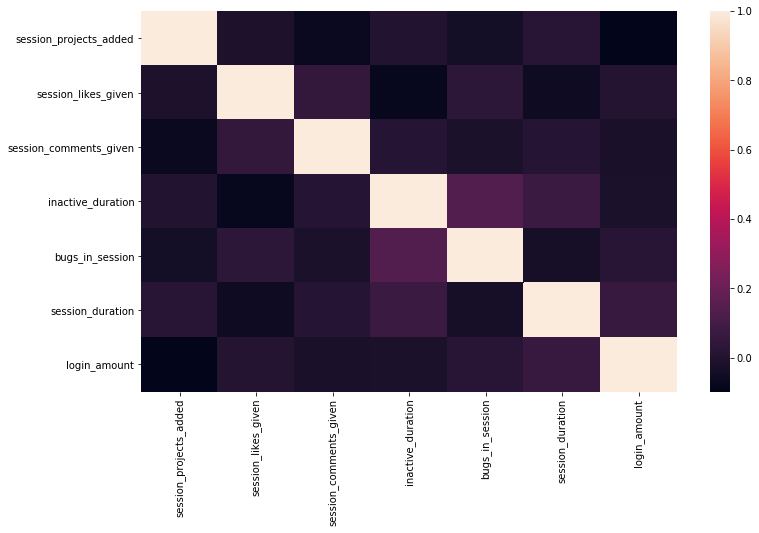

In [20]:
plt.figure(figsize=(12, 7));
sns.heatmap(df2.corr());

The heat matrix is important because it shows correlation. Correlation helps indicate when variables influence each other. While most of the correlation boxes are near 0, **'inactive_duration'** and **'bugs_in_session'** stand out. Before exploring this, we will further visualize the data with a pair plot.   

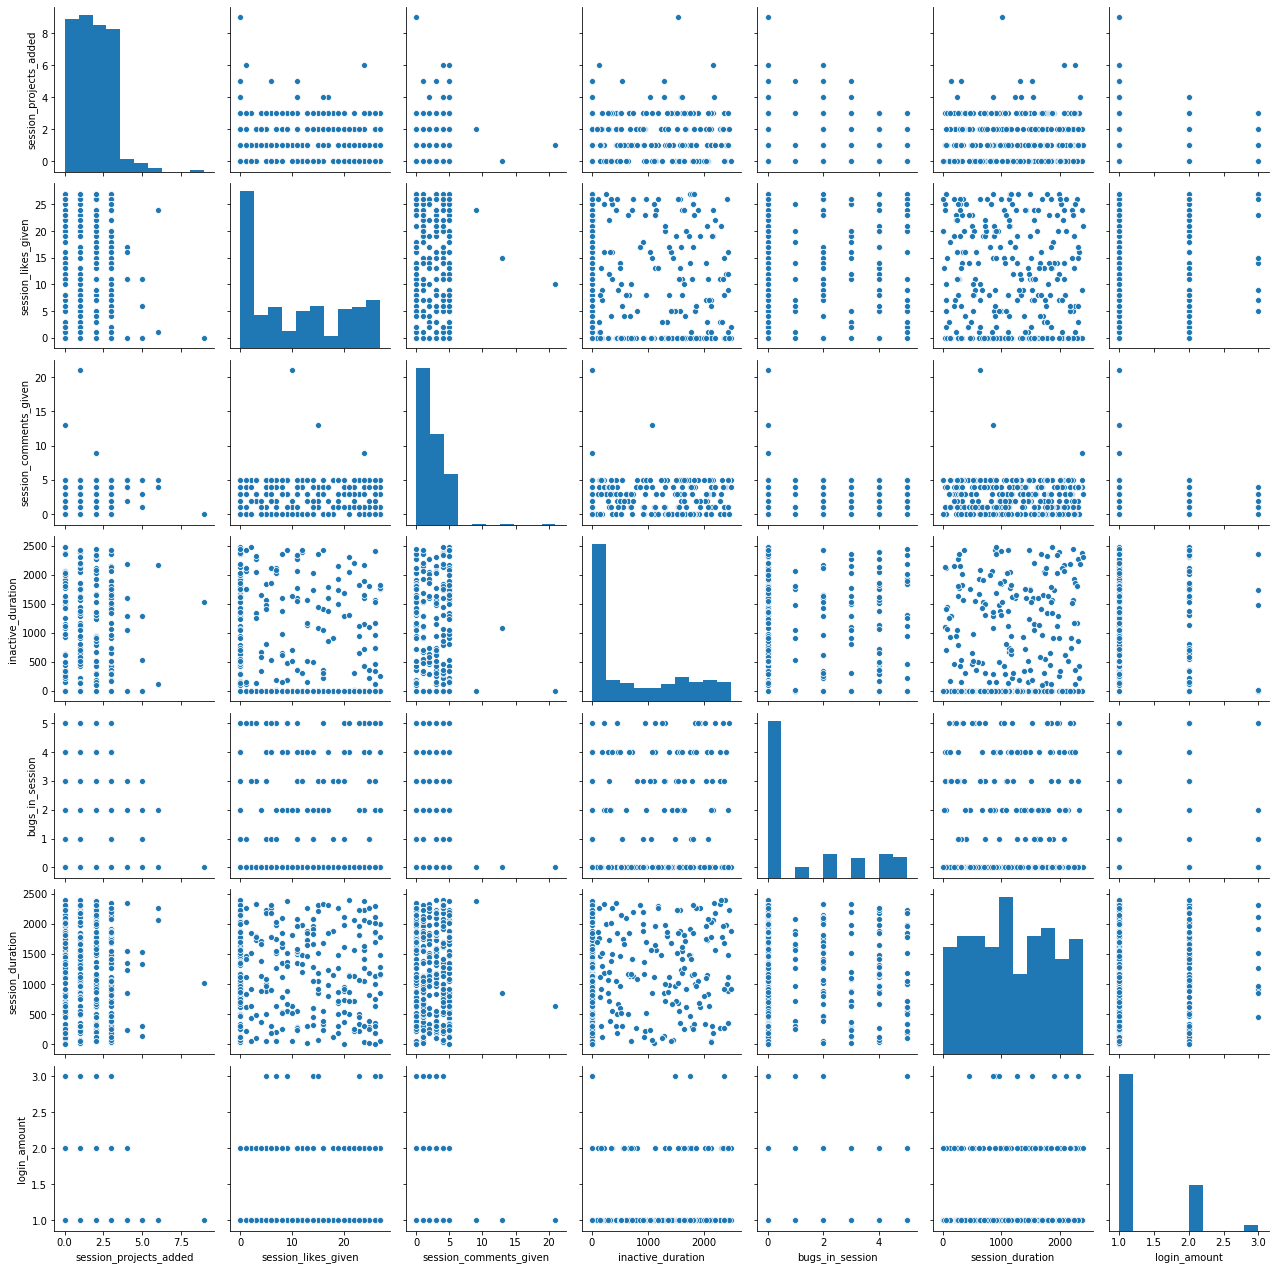

In [21]:
sns.pairplot(df2);

From the diagonal session projects added, likes given, inactive duration, and bugs in session are grouped near 1. Indicated that most sessions have engagement. To verify this, we must use descriptive statistics.

In [22]:
#Pandas will get the descriptive statistics for us. 
df2.describe()

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_amount
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.618729,10.458194,2.408027,731.638796,1.237458,1190.414716,1.280936
std,1.336799,9.474839,2.251190,839.247660,1.759100,686.871418,0.512925
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
25%,1.000000,0.000000,0.500000,0.000000,0.000000,614.000000,1.000000
50%,2.000000,9.000000,2.000000,312.000000,0.000000,1152.000000,1.000000
75%,3.000000,19.000000,4.000000,1525.500000,2.500000,1778.000000,1.500000
max,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000,3.000000


When observing the statistics the **mean** stands out in classifying engagement. Emphasizing this, below. 

In [23]:
#The average user engagement for the month of October.
print(df2.mean())

session_projects_added       1.618729
session_likes_given         10.458194
session_comments_given       2.408027
inactive_duration          731.638796
bugs_in_session              1.237458
session_duration          1190.414716
login_amount                 1.280936
dtype: float64


Users are engaging with the platform. The average user spends 20 minutes engaged, liking 10 items per session, and commenting on a fifth of those. While there is a lot of good, two negative items are present. 

The average user is inactive for 12 minutes and encounters at least one bug. A reason for the high inactivity could be how inactive duration is recorded. Technolgy reports are often dense in information and require more time to read than a Facebook post. Mix this with a large monitor and a user could become "inactive" for short periods, but this is speculation and is not bolstered with data. Instead, a quantitative reason could be bugs. 



# 2. Inactivity due to bugs

In the heat map, a non-zero correlation was present with inactive duration and bugs. This correlation might help explain why inactivity is occurring. Here we explore the numerical value and plot the correlation. 

,inactive_duration,bugs_in_session
inactive_duration,1.000000,0.137024
bugs_in_session,0.137024,1.000000


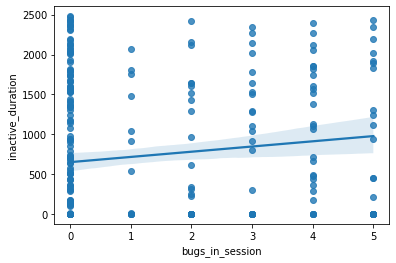

In [24]:
sns.regplot( df.bugs_in_session,df.inactive_duration)
df[['inactive_duration', 'bugs_in_session']].corr()

The correlation for the variables is 0.137024. This indicates a weak linear correlation, as viewed within the plot. More so, the plot shows the most inactive time occurs without a bug. 

In [25]:
#Using temporary variables to find the average inactive time for users without a bug. 
total = 0
k = 0
length = (df.shape[0])
for i in range(length):
    if df["bugs_in_session"][i] == 0:
        total += df["inactive_duration"][i]
        k += 1
print( "The average amount of inactive time spent by someone without a bug is" , total/k ) 

The average amount of inactive time spent by someone without a bug is 650.9781420765028


Thus the average inactive time due to bugs is 1 minute and 20 seconds more than those without a bug. 

Since bugs are not a strong reason inactive time occurs, its specious to think we could ignore them. A quick Google search indicates, [88% of users reported they would abandon an app if they encountered bugs or glitches](https://www.applause.com/blog/app-abandonment-bug-testing#:~:text=A%20survey%20of%20over%201%2C000,least%20one%20bug%20every%20day.), bugs should not be ignored. 

# 3. Frequency of Events

The frequency of good events occurring is a reflection of platform success. Therefore, we will explore the expectations of events. 

In [26]:
#Looking at the boolean values, we determine the expectation of doing activities. 
for i in df[['projects_added',
       'likes_given', 'comment_given', 'inactive_status', 'bug_occured','multiple_sessions']]:
    series = df[i]
    print("Column name:", i )
    print("Likelihood of occurring during a session", series.mean())
    print("-"*60)

Column name: projects_added
Likelihood of occurring during a session 0.7558528428093646
------------------------------------------------------------
Column name: likes_given
Likelihood of occurring during a session 0.7123745819397993
------------------------------------------------------------
Column name: comment_given
Likelihood of occurring during a session 0.7491638795986622
------------------------------------------------------------
Column name: inactive_status
Likelihood of occurring during a session 0.5719063545150501
------------------------------------------------------------
Column name: bug_occured
Likelihood of occurring during a session 0.3879598662207358
------------------------------------------------------------
Column name: multiple_sessions
Likelihood of occurring during a session 0.2508361204013378
------------------------------------------------------------


User engagement is high with each login, as all positive (non-time related) events occur with more than 70% of the time.

Inactivity and bugs are frequent, occurring 57% and 38% of the time. 38% of Showwcase users encountering at least one bug is a major concern.  Using statistics we can explain why.

Let,

$$ \text{A} = \text{Showwcase users encounters a bug} = 38.8\% \text{ and } \text{B} = \text{Leaving due to a bug} = 88\%$$

Where both events occur without the other, that is they are independent.

Then the probability of being a Showwcase user and leaving due to a bug is 

$$ P (\text{A and B} ) = P(A)*P(B) = 88\% * 38.8\% = 34.1\%$$

If Showwcase wishes to minimize users leaving, bugs should not be ignored and fixed promptly. 

# IV. Conclusion

User engagement can be defined through many mediums. It could be likes, comments, updating a profile, or time reading an article. When exploring how users engage we explored every metric available and found ways to improve tracking.

In data exploration, we found that the average users spend 20 minutes engaged, likes 10 posts, and comments on 2 posts. Since no prior history of engagement is given, it's difficult to determine if this is good or bad. Modeling was refrained from due to weak correlations and a low sample size ($n=299$). When modeling, it's important to have a dataset of $n>500$ as this number usually follows the Central Limit Theorem. Despite this, visualizations show that metics mainly follow a logarithmic pattern or approach normal distribution. The magnitude of correlation was highest with bugs and inactive time.

Most users will not encounter a bug and spend 10 minutes and 51 seconds inactive. This could be a result of how inactive time is recorded. Furthermore, bugs occur 38% of the time and should be fixed due to users' willingness to abandon a buggy platform.